# NitinPal_E_Commerc_Capstone_Project

###  Objective : 
+ A company is focusing on the ecommerce data available on their portal and wants to identify the most important factors 
 involved in reaching the product on time or not. If yes, then what are those factors, and if not then what are those factors too?

### Data Dictionary:
##### Each record in the database provides a description of the product. A detailed data dictionary can be found below.
+ ID: Id of the customer
+ Warehouse Block: There are four warehouse in which product are stored A, B, C and D. 
+ Mode of shipment: There are three ways for shipment of the product Road, Flight and Ship.
+ Customer Care Calls: Calls were made by the customer to customer support which are vary between 2 to 7.
+ Customer Ratings: Ratings were given by the customer to the product which are vary between 0 to 5.
+ Cost of the product: Cost of the product is the price of a particular product.
+ Prior Purchase: Prior Purchase is vary between the 1 to 10 in the dataset.
+ Product Importance:  Product importance for the customer is shown in three category in this dataset Low, Medium and High.
+ Gender: The product buyer is male or female.
+ Discount Offered: Discount offered is in values in this dataset not in percentage.
+ Weight in gms: Product is measured in weight(gms) not in numbers.
+ Reached on time Y.N.: Product is reached or not that is shown in the number if yes then 1 and if not then 0.

##  1. Data Exploration and Cleaning

In [1]:
# Import Required Libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, root_mean_squared_error, f1_score, mean_squared_error, r2_score

#### Task 1: Load the dataset into a pandas DataFrame and display the first few rows

In [2]:
# Upload Dataset
df = pd.read_csv('E_Commerce.csv')
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


+ Above code is written to laod the datset into pandas dataframe and to display few rows of the dataset.

In [3]:
df.shape

(10999, 12)

+ There are 12 columns and 10999 rows which are indexing from 0 to 10998.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


+ There are 8 numeric(int type) and 4 string(Object type) columns in dataset.
+ The target variables of the dataset is Reached on time Y.N. which is numeric(int type).

#### Task 2: Summarize the dataset by providing basic statistics (mean, median, mode, standard  deviation, etc.).

In [5]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


+ The above code displays the summary statistics for dataset, including both numerical statistics and the mode for each column.

#### Task 3: Identify and handle missing values. Explain the chosen method for handling them.

In [6]:
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

+ The above code shows that there is not any missing or null values.

 #### Task 4: Identify and handle duplicate rows if any.

In [7]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10994    False
10995    False
10996    False
10997    False
10998    False
Length: 10999, dtype: bool

+ The above code shows dataset do not have any duplicate value in it.

#### Task 5: Convert categorical variables to numerical values using appropriate encoding techniques(e.g., one-hot encoding, label encoding)

In [8]:
# Preprocessing: Encode Categorical Variables 
Label_Encoder = LabelEncoder()

df['Warehouse_block'] = Label_Encoder.fit_transform(df['Warehouse_block'])
df['Mode_of_Shipment'] = Label_Encoder.fit_transform(df['Mode_of_Shipment'])
df['Product_importance'] = Label_Encoder.fit_transform(df['Product_importance'])
df['Gender'] = Label_Encoder.fit_transform(df['Gender'])

In [9]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,3,0,4,2,177,3,1,0,44,1233,1
1,2,4,0,4,5,216,2,1,1,59,3088,1
2,3,0,0,2,2,183,4,1,1,48,3374,1
3,4,1,0,3,3,176,4,2,1,10,1177,1
4,5,2,0,2,2,184,3,2,0,46,2484,1


+  Label Encoder is used here to convert the categorical variables in dummy variables. Here are few rows displayed to show the encoded dataset. 

##  2. Data Visualization

####  Task 6: Create visualizations to understand the distribution of numerical features (e.g., histograms, box plots).

In [10]:
numerical_features = ['Customer_care_calls', 'Customer_rating',	'Cost_of_the_Product',	'Prior_purchases',
                      'Discount_offered', 'Weight_in_gms']

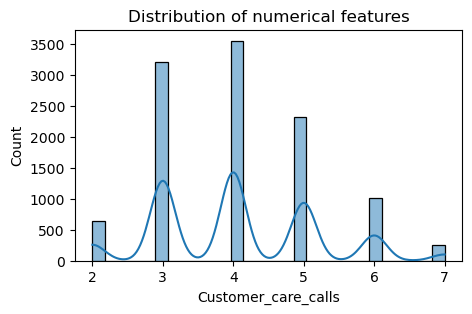

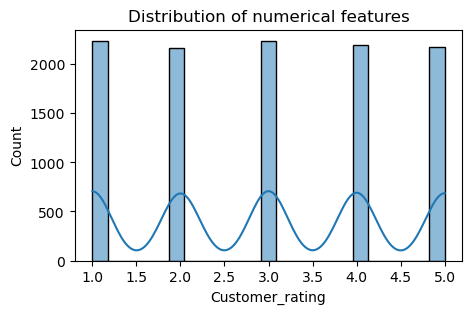

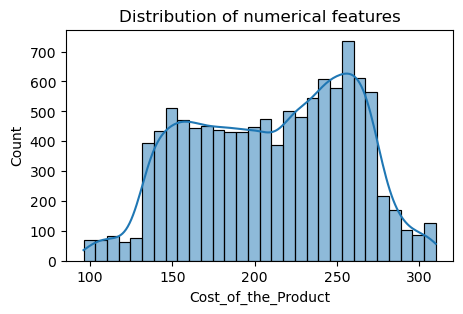

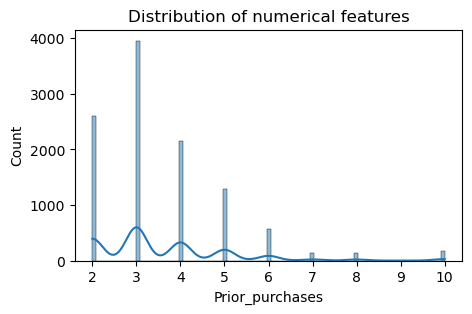

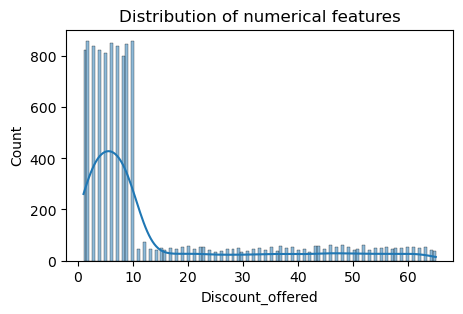

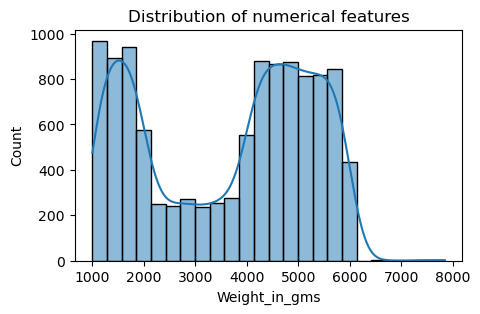

In [11]:
# Plot Histogram for Numerical Features:
for feature in numerical_features:
    plt.figure(figsize=(5,3))
    sns.histplot(df[feature], kde = True)
    plt.title('Distribution of numerical features')
    plt.xlabel(feature)
    plt.show()

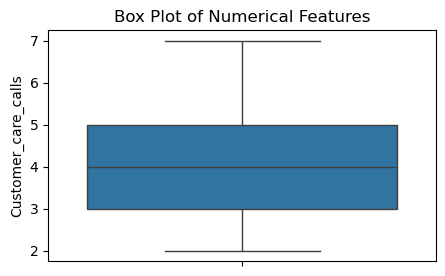

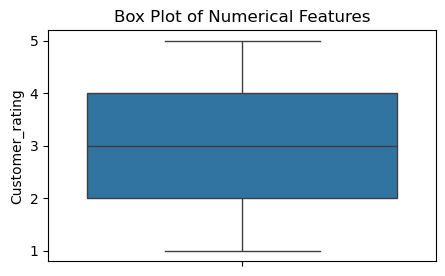

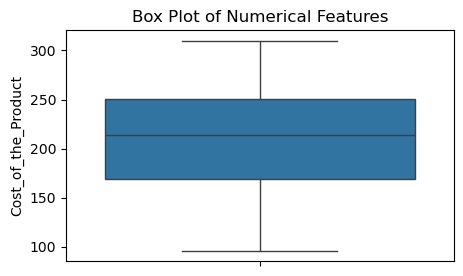

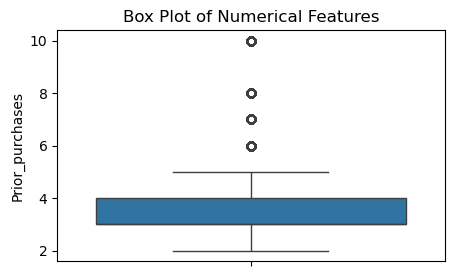

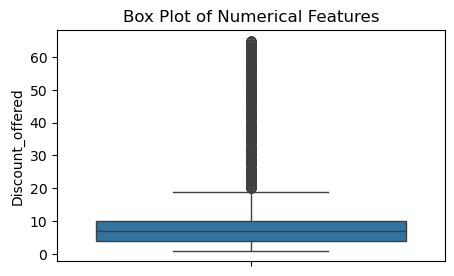

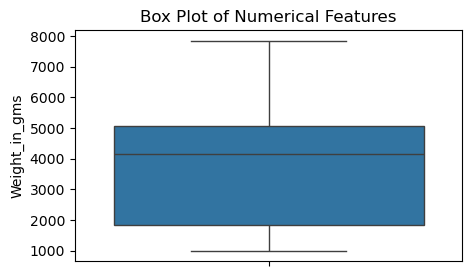

In [12]:
# Plot Box Plot for numerical features:
for feature in numerical_features:
    plt.figure(figsize=(5, 3))
    sns.boxplot(y=df[feature])
    plt.title('Box Plot of Numerical Features')
    plt.ylabel(feature)
    plt.show()


+ one variable is made named numerical features to show all the integer type column in that variable. For loop is used here to iterate in every numerical features for ploting the Histogram and Boxplot.

#### Task 7: Create visualizations for categorical features (e.g., bar charts, pie charts).

In [13]:
# Categorical Features:
categorical_features = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']

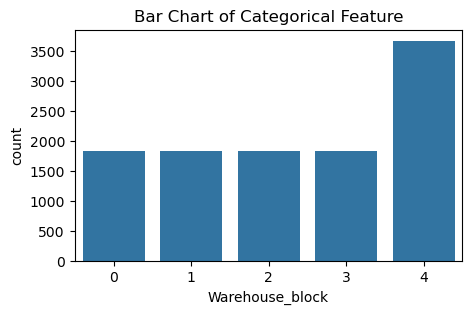

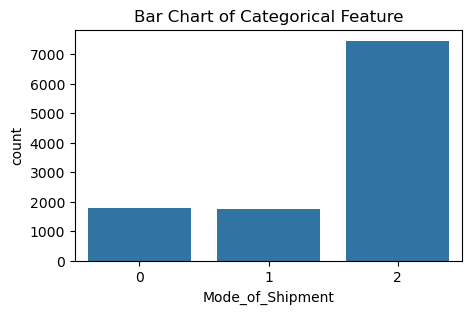

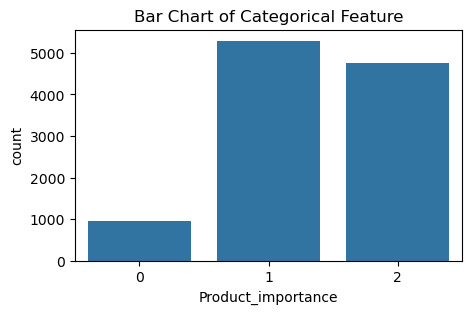

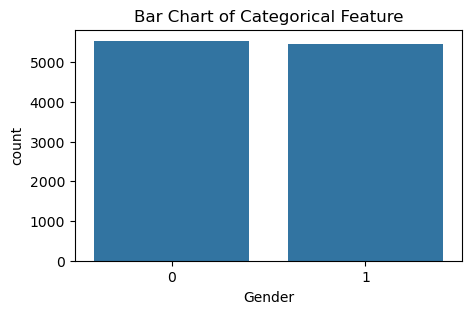

In [14]:
# Plot Bar Charts for Categorical Features:
for feature in categorical_features:
    plt.figure(figsize=(5, 3))
    sns.countplot(data = df, x=feature)
    plt.title('Bar Chart of Categorical Feature')
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.show()

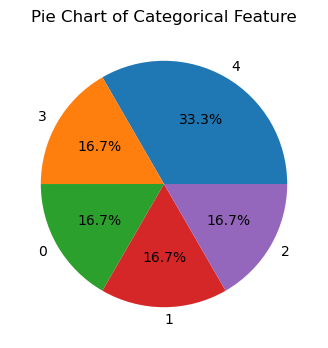

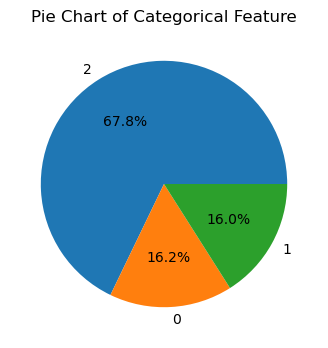

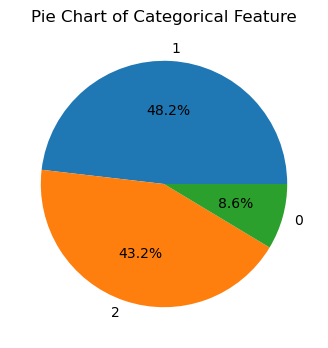

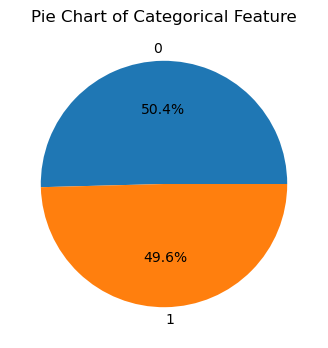

In [15]:
# Plot Pie Chart for Categorical Variables:

for feature in categorical_features:
    plt.figure(figsize=(5, 4))
    counts = df[feature].value_counts()
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
    plt.title('Pie Chart of Categorical Feature')
    plt.show()

+ one variable is made named Categorical features to show all the integer type column in that variable. For loop is used here to iterate in every Categorical features for ploting the Bar Chart and Pie Chart.

####  Task 8: Generate correlation heatmaps to identify relationships between numerical features.

In [16]:
# Calculate Correlation Matrix:
corr_matrix = df[numerical_features].corr()

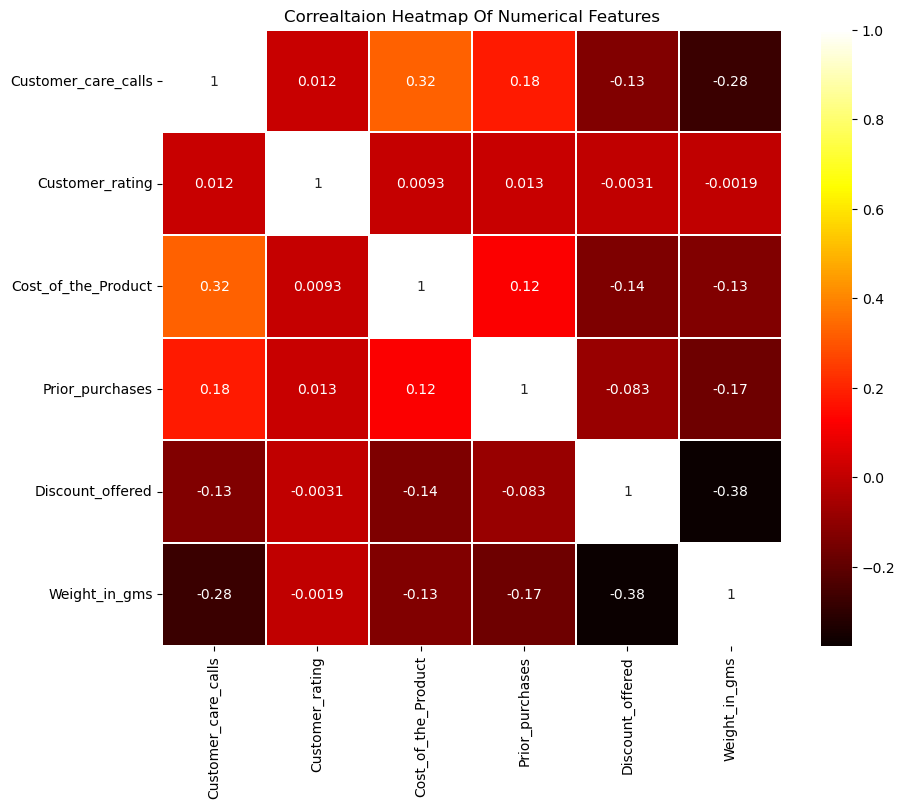

In [17]:
# Plot Correlation Heatmap: 
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot = True, cmap = 'hot', linewidth = 0.3)
plt.title('Correaltaion Heatmap Of Numerical Features')
plt.show()

#### Task 9: Use pair plots to visualize relationships between features.

<Figure size 2000x2000 with 0 Axes>

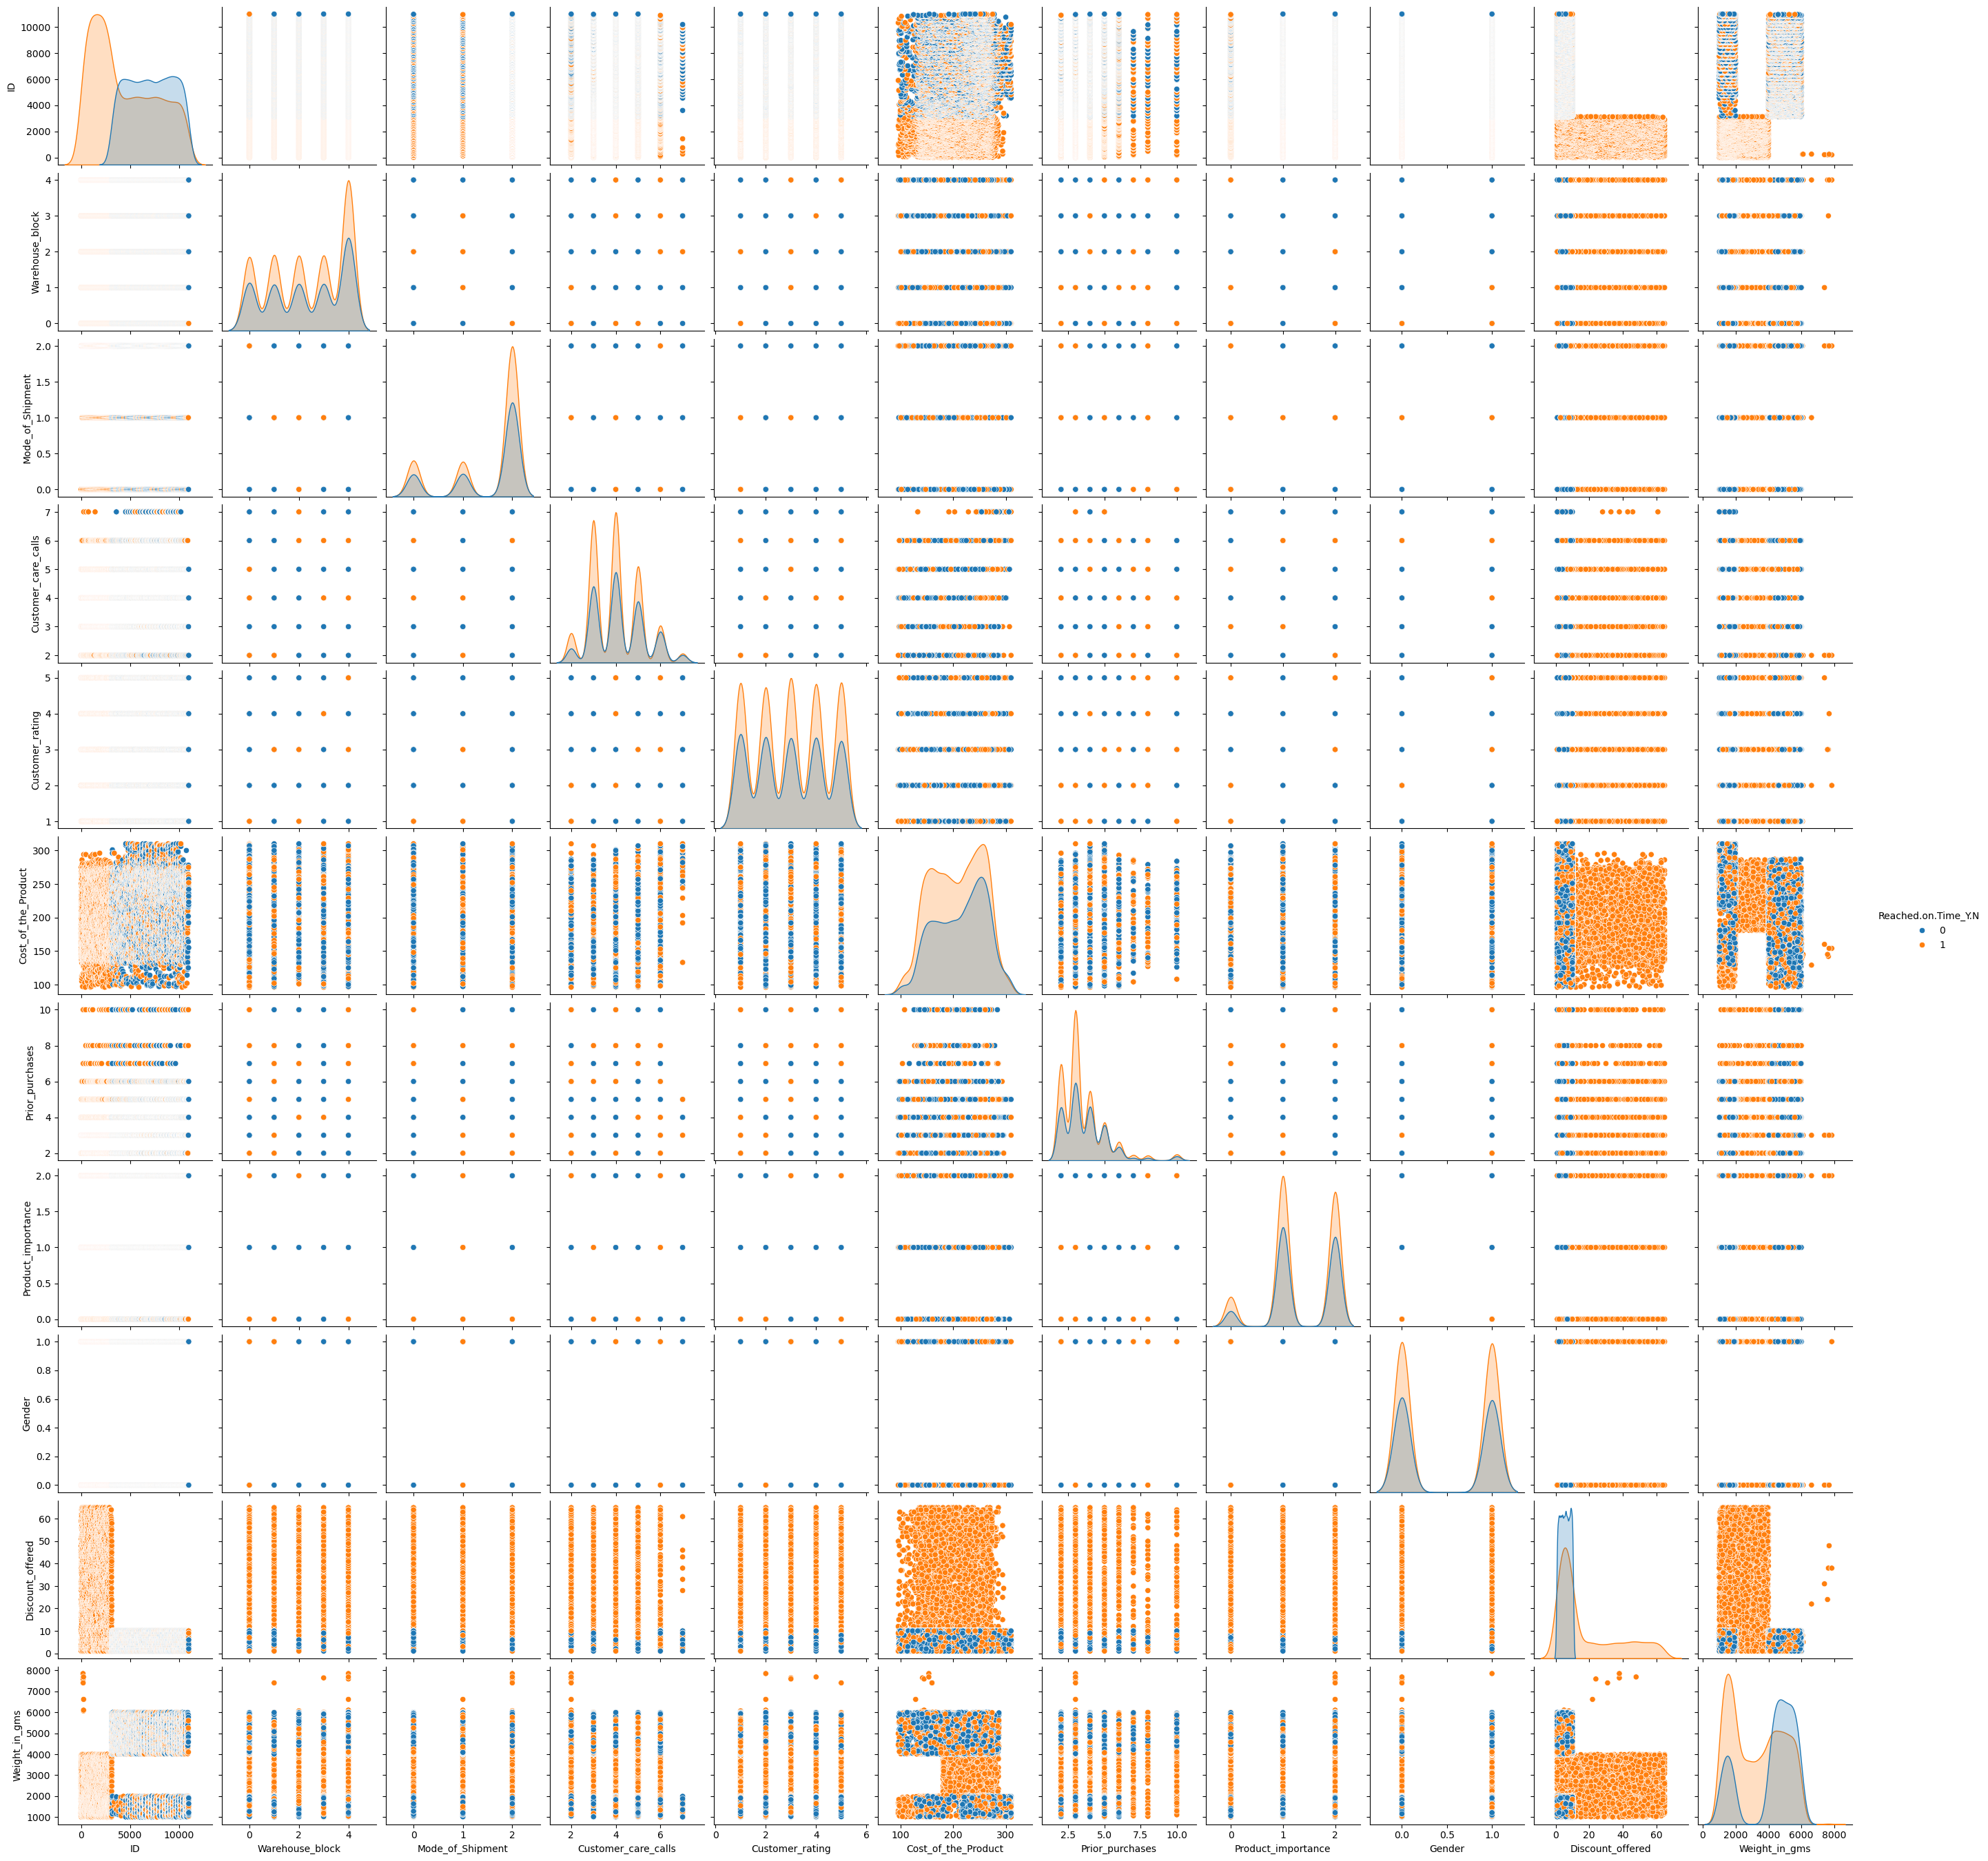

In [18]:
# Create Pair Plot:
plt.figure(figsize=(20,20))
sns.pairplot(df, hue = 'Reached.on.Time_Y.N')
plt.show()

### Feature Engineering:

#### Task 10: Create new features that might be useful for the analysis (e.g., date-related features from timestamps, interaction terms).

In [19]:
# 1. Create interaction features
df['Cost_per_gram'] = df['Cost_of_the_Product'] / df['Weight_in_gms']
df['Discount_percentage'] = (df['Discount_offered'] / df['Cost_of_the_Product']) * 100
df['Cost_after_discount'] = df['Cost_of_the_Product'] - df['Discount_offered']

# 2. Create categorical interaction features
df['Care_calls_per_purchase'] = df['Customer_care_calls'] / df['Prior_purchases']

# Print summary of new features
print("New Features Summary:")
print("Numerical Features:")
for col in ['Cost_per_gram', 'Discount_percentage', 'Cost_after_discount', 
            'Care_calls_per_purchase']:
    print("{col}:")
    print(df[col].describe())

New Features Summary:
Numerical Features:
{col}:
count    10999.000000
mean         0.079229
std          0.055913
min          0.016482
25%          0.039771
50%          0.054916
75%          0.103455
max          0.309073
Name: Cost_per_gram, dtype: float64
{col}:
count    10999.000000
mean         7.023666
std          9.268773
min          0.322581
25%          1.754386
50%          3.333333
75%          6.296459
max         63.636364
Name: Discount_percentage, dtype: float64
{col}:
count    10999.000000
mean       196.823620
std         52.802998
min         36.000000
25%        155.000000
50%        200.000000
75%        241.000000
max        309.000000
Name: Cost_after_discount, dtype: float64
{col}:
count    10999.000000
mean         1.279727
std          0.501439
min          0.200000
25%          1.000000
50%          1.333333
75%          1.500000
max          3.000000
Name: Care_calls_per_purchase, dtype: float64


+ We created some meaningful features that would enhance machine learning model performance, leading to improved accuracy.
+ The Features names are:
+  Cost per Gram was created to know the cost of the product in gram.
+ Discount percentage was created to know how much discount is given in percentage to the customers.
+ Cost after Discount was created to know the net sale value of the product.
+ Care calls per purchase was created to know how much is the product have importance for the customer through how much time he or she made the call to customer support.

In [20]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Cost_per_gram,Discount_percentage,Cost_after_discount,Care_calls_per_purchase
0,1,3,0,4,2,177,3,1,0,44,1233,1,0.143552,24.858757,133,1.333333
1,2,4,0,4,5,216,2,1,1,59,3088,1,0.069948,27.314815,157,2.000000
2,3,0,0,2,2,183,4,1,1,48,3374,1,0.054238,26.229508,135,0.500000
3,4,1,0,3,3,176,4,2,1,10,1177,1,0.149533,5.681818,166,0.750000
4,5,2,0,2,2,184,3,2,0,46,2484,1,0.074074,25.000000,138,0.666667


#### Task 11: Standardize or normalize numerical features if needed.

In [21]:
# 1. Standardization:
standard_scaler = StandardScaler()
df_standardized = df.copy()
df_standardized[numerical_features] = standard_scaler.fit_transform(df[numerical_features])

print('Standardized Data:')
print(df_standardized.head())

Standardized Data:
   ID  Warehouse_block  Mode_of_Shipment  Customer_care_calls  \
0   1                3                 0            -0.047711   
1   2                4                 0            -0.047711   
2   3                0                 0            -1.799887   
3   4                1                 0            -0.923799   
4   5                2                 0            -1.799887   

   Customer_rating  Cost_of_the_Product  Prior_purchases  Product_importance  \
0        -0.700755            -0.690722        -0.372735                   1   
1         1.421578             0.120746        -1.029424                   1   
2        -0.700755            -0.565881         0.283954                   1   
3         0.006689            -0.711529         0.283954                   2   
4        -0.700755            -0.545074        -0.372735                   2   

   Gender  Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  \
0       0          1.889983      -1.468240

+ Standard Scaler was used to ensure that all data points are on the same scale, which helps in detecting and correcting errors and inconsistencies. 

In [22]:
# 2. Normalization:
Minmax_Scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized[numerical_features] = Minmax_Scaler.fit_transform(df[numerical_features])

print("Normalized Data:")
print(df_normalized.head())

Normalized Data:
   ID  Warehouse_block  Mode_of_Shipment  Customer_care_calls  \
0   1                3                 0                  0.4   
1   2                4                 0                  0.4   
2   3                0                 0                  0.0   
3   4                1                 0                  0.2   
4   5                2                 0                  0.0   

   Customer_rating  Cost_of_the_Product  Prior_purchases  Product_importance  \
0             0.25             0.378505            0.125                   1   
1             1.00             0.560748            0.000                   1   
2             0.25             0.406542            0.250                   1   
3             0.50             0.373832            0.250                   2   
4             0.25             0.411215            0.125                   2   

   Gender  Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  \
0       0          0.671875       0.033893  

+ Noramlization was done to give the specific value range without changing the shape of the original distribution.

###  4. Model Building

####  Task 12: Split the dataset into training and testing sets

In [23]:
# Seprate Features and Target:
X = df.drop(['Reached.on.Time_Y.N'], axis = 1)
y = df['Reached.on.Time_Y.N']

In [24]:
# Split Data into Training and Test(Training:80%, Test:20%):
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

+ We split the data into X and y variables. Where train size of the data were 80% and test size were 20%.

#### Task 13: Train a simple linear regression model (if the task is regression) or a logisticregression model (if the task is classification).

In [25]:
# Perform Linear Regression Model:
LN = LinearRegression()
LN.fit(X_train, y_train)
LN_predictions = LN.predict(X_test)

In [26]:
# Perform Logistic Regression Model:
LG = LogisticRegression()
LG.fit(X_train, y_train)
LG_predictions = LG.predict(X_test)

C:\Users\age\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


+ In this task, we performed the Linear Regression and Logistic Regression. We Trained, fit and predicted the data into Linear Rgression and Logistic Regression. 

#### Task 14: Evaluate the model performance using appropriate metrics (e.g., RMSE for regression, accuracy/F1-score for classification).

In [27]:
# Evaluate Linear REgression:
MSE = mean_squared_error(y_test, LN_predictions)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test, LN_predictions)

print('Mean Squared Error for the Linear Regression Model is', MSE)
print('Root Mean Squared Error for the Linear Regression Model is', RMSE)
print('R2 Score for the Linear Regression Model is', R2)

Mean Squared Error for the Linear Regression Model is 0.18586420148246813
Root Mean Squared Error for the Linear Regression Model is 0.43111970667375915
R2 Score for the Linear Regression Model is 0.22979281647711136


In [28]:
# Evaluate Logistic Regression Model:
LG_accuracy = accuracy_score(y_test, LG_predictions)
LG_F1 = f1_score(y_test, LG_predictions)

print('Accuracy score for the Logistic Regression Model is', LG_accuracy)
print('F1 Score for the Logistic Regression Model is', LG_F1) 

Accuracy score for the Logistic Regression Model is 0.6627272727272727
F1 Score for the Logistic Regression Model is 0.7092476489028213



+ In this task, we evaluated the prediction of both mdels Linear Regression and Logistic Regression. Where we found Logistic Regression is far better here than Linear Regression. We use three method here to know the accuracy of the Linear Regression, First method was Mean Squared Error: according to it the prediction score was only about 18%. Second method was Root Mean Squared Error: according to it the prediction score was only 43%. Third one was R2 Score: according to it the prediction score was only about 23%, which are not good to train a model. While in Logistic Regression we used two method first one was Accuracy Score: according to it prediction score was 66% and second one was F1 score: according to it prediction score was about 71% which may be better to train a model. but we can try other model as well to find the best.  

#### Task 15: Experiment with at least two other algorithms (e.g., decision tree, random forest, k-nearest neighbors) and compare their performance).
 

In [29]:
# Perform Decision Tree Model:
DT = DecisionTreeClassifier()
DT.fit (X_train, y_train)
DT_predictions = DT.predict(X_test)

In [30]:
# Evaluate Decision Tree Model:
DT_accuracy = accuracy_score(y_test, DT_predictions)
DT_F1 = f1_score(y_test, DT_predictions)

print('Accuracy Score for the Decision Tree Model is', DT_accuracy)
print('F1 score for the Decision Tree Model is', DT_F1)

Accuracy Score for the Decision Tree Model is 0.6422727272727272
F1 score for the Decision Tree Model is 0.6990439770554493


In [31]:
# Perform K Nearest Neighbour Model:
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)
KNN_predictions = KNN.predict(X_test)

In [32]:
# Evaluate K Nearest Neighbour Model:
KNN_accuracy = accuracy_score(y_test, KNN_predictions)
KNN_F1 = f1_score(y_test, KNN_predictions)

print('Accuracy Score for the K Nearest Neighbour Model is', KNN_accuracy)
print('F1 Score for the K Nearest Neighbour Model is', KNN_F1)

Accuracy Score for the K Nearest Neighbour Model is 0.6495454545454545
F1 Score for the K Nearest Neighbour Model is 0.6953773212169103


+ In this task as per said we tried two more models to find the best model to trian the dataset. First one is Decision Tree: When we train the data and made the prediction we found prediction score was about to 65% according to accuracy score method and 70% was according to F1 score. While the other model name was K Nearest Neighbour: according to it we found the accuracy score of the prediction was about to 65% and F1 score was about to 69%.

### Model Tuning

#### Task 16: Perform hyperparameter tuning using GridSearchCV or RandomizedSearchCV

In [33]:
# Initialize Base Model:
RF = RandomForestClassifier()

# Perform Grid Search Cross Validation Model:
grid_params = {
                'n_estimators': [100, 200, 300],
                'max_depth': [10, 20, 30, None],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4],
                'criterion': ['gini']
}

GS = GridSearchCV(
                  estimator = RF,
                  param_grid = grid_params,
                  cv = 3, 
                  verbose = 1,
                  scoring = 'accuracy'
)

GS.fit(X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini'], 'max_depth': [10, 20, 30, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=1)

In [34]:
# Perform Random Search Cross Validation Model:
random_params = {
                'n_estimators': [100, 500],
                'max_depth': [10, 20],
                'min_samples_split': [5, 10],
                'min_samples_leaf': [5, 10],
                'criterion': ['entropy']
}

RS = RandomizedSearchCV(
                        estimator = RF,
                        param_distributions = random_params,
                        n_iter = 5, 
                        cv = 5,
                        verbose = 1,
                        scoring = 'accuracy'
)

RS.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'criterion': ['entropy'],
                                        'max_depth': [10, 20],
                                        'min_samples_leaf': [5, 10],
                                        'min_samples_split': [5, 10],
                                        'n_estimators': [100, 500]},
                   scoring='accuracy', verbose=1)

#### Task 17: Evaluate and compare the tuned models’ performance.

In [35]:
# Evaluate both models:

best_grid_model = GS.best_estimator_
best_random_model = RS.best_estimator_

y_pred_grid = best_grid_model.predict(X_test)
y_pred_random = best_random_model.predict(X_test)

grid_accuracy = accuracy_score(y_test, y_pred_grid)
random_accuracy = accuracy_score(y_test, y_pred_random)

print('Accuracy Score For the Grid Search Cross Validation is', grid_accuracy)
print('Accuracy Score for the Random Search Cross Validation is', random_accuracy)

Accuracy Score For the Grid Search Cross Validation is 0.6931818181818182
Accuracy Score for the Random Search Cross Validation is 0.6931818181818182


+ In this task we used Hyperparameter tuning optimize machine learning model performance by finding the best settings for hyperparameters that maximize accuracy and generalization. When model was evaluated it was found the accuracy score for both techniques Grid search cross validation and Random Search cross validation are very similar to each other. 

### Conclusion

+ Question 1. What was the customer reatings? Was the product delivered on time?
+ Answer 1. In this dataset customer rating vary between 1 to 5. if We talk about the product delevered on time or not then we can say, mostly prodcut was delivered on time but there was some product which was not delvered on time. 

+ Question 2. Is customer query is being answered if product importance is high, having highest customer rating
  or being delivered on time?
+ Answer 2. Yes, if product importance is high then customer calls was answered at a priority level and mostly high priority product were delivered on time and customer gave them high ratings too.

+ Question 3. Make different Machine Learning models and compare their results.
+ Answer 3. We trained the dataset on four different Machine Learning Model Linear Regression, Logistic Regression, Decision Tree, K Nearest Neighbour. In which it was found Logistic Regression is the best in all among four models to train the dataset. Because it has the highest prediction score in all. It has 70.92% score which is good to train a dataset in Machine Learning.